In [105]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from geone import img
import geone.imgplot as imgplt

cm     = 1/2.54  # centimeters in inches

In [108]:
plt.rcParams.update({'axes.facecolor':'lightgrey'})
plt.rcParams.update({'font.size': 10})

## Main surfaces

In [106]:
extension = [664525,734725,6152875,6207725]
origin    = [664525, 6152875] #x, y
sx, sy    = [50, 50]

In [107]:
set_surfaces = []

#load and interpolate to the new surfaces to the new resolution
#names_select = ['s2_quat','upc_2', 'upc_12','upc_1', 's3_pc']
names_select = ['s1_mnt','s2_quat', 's3_pc','s4_pms']
path_load = '../../09_modflow_roussillon/98_data/raster/2023_surfaces_txt/'

for file in names_select:
    print(file)
    #rast = Raster.load(path_base+'asc/{}.asc'.format(file))
    #rast = np.loadtxt(path_base+'asc/{}.asc'.format(file),skiprows=6)
    rast = np.loadtxt(path_load+'ascii_2023_{}.txt'.format(file),skiprows=6)
    rast[rast==9999] = np.nan
    rast = np.flipud(rast)
    set_surfaces.append(rast)

s1_mnt
s2_quat
s3_pc
s4_pms


In [4]:
import joblib
joblib.dump(set_surfaces,'98_data/surfaces.pickle')

['data/surfaces.pickle']

In [5]:
import joblib
set_surfaces = joblib.load('98_data/surfaces.pickle')

In [113]:
diffs = []

for i in range(3):
    toit = set_surfaces[i]
    mur  = set_surfaces[i+1]
    diff = toit - mur
    diffs.append(diff)
    
max_diff = np.nanmax(diffs)
min_diff = np.nanmin(diffs)

max_alt = np.nanmax(set_surfaces)
min_alt = np.nanmin(set_surfaces)

max_diff, min_diff, max_alt, min_alt

/tmp/ipykernel_24349/1938064089.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_24349/1938064089.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), rotation = 45)
/tmp/ipykernel_24349/1938064089.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_24349/1938064089.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), rotation = 45)
/tmp/ipykernel_24349/1938064089.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_24349/1938064089.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), rotation = 45

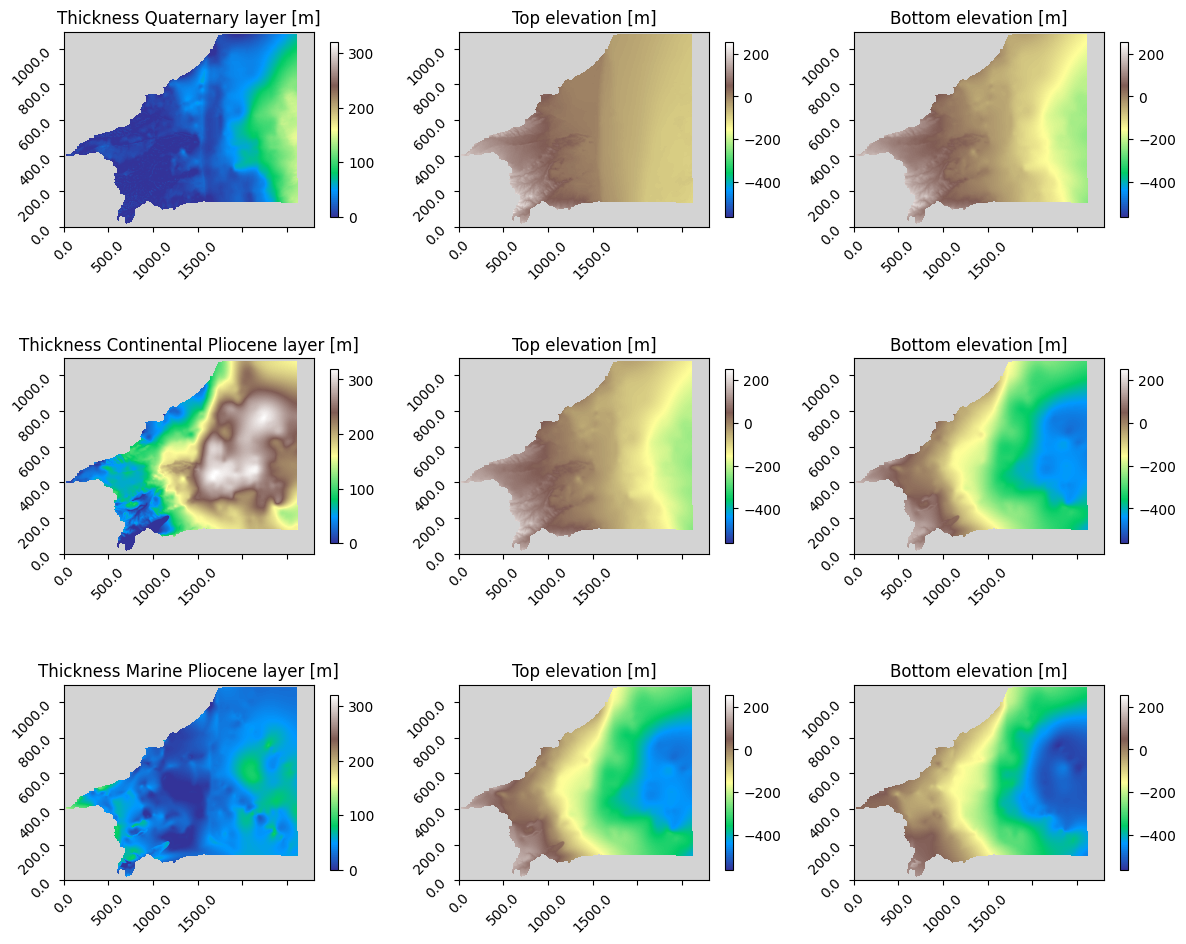

In [119]:
pos    = 'lower'
shrink = 0.6
cm     = 1/2.54  # centimeters in inches
titles = ['Quaternary', 'Continental Pliocene', 'Marine Pliocene']

fig   = plt.figure(figsize=(12,10))
count = 1
for i in range(3):
    toit = set_surfaces[i]
    mur  = set_surfaces[i+1]
    diff = toit - mur

    ax  = fig.add_subplot(3,3,count)
    cax = ax.imshow(diff, cmap='terrain', origin='lower', vmin=min_diff, vmax=max_diff)
    ax.set_title('Thickness {} layer [m]'.format(titles[i]))
    plt.colorbar(cax, ax=ax, shrink=shrink)
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    ax.set_yticklabels(ax.get_yticks(), rotation = 45)
    count+=1

    ax  = fig.add_subplot(3,3,count)
    cax = ax.imshow(toit, cmap='terrain', origin='lower', vmin=min_alt, vmax=max_alt)
    ax.set_title('Top elevation [m]')
    plt.colorbar(cax, ax=ax, shrink=shrink)
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    ax.set_yticklabels(ax.get_yticks(), rotation = 45)
    count+=1
    
    ax  = fig.add_subplot(3,3,count)
    cax = ax.imshow(mur, cmap='terrain', origin='lower', vmin=min_alt, vmax=max_alt)
    ax.set_title('Bottom elevation [m]')
    plt.colorbar(cax, ax=ax, shrink=shrink)
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    ax.set_yticklabels(ax.get_yticks(), rotation = 45)
    count+=1
#plt.colorbar(shrink=0.3)

plt.tight_layout()
plt.savefig('99_images/thesis_image/surfaces/surfaces_aquifer.pdf', bbox_inches='tight')
plt.show()

## UPC surfaces

In [121]:
set_surfaces_upc = []

#load and interpolate to the new surfaces to the new resolution
names_select = ['s2_quat','upc_2', 'upc_12','upc_1', 's3_pc']

#names_select = ['s1_mnt','s2_quat', 's3_pc','s4_pms']
path_load = '../../09_modflow_roussillon/98_data/raster/2023_surfaces_txt/'

for file in names_select:
    print(file)
    #rast = Raster.load(path_base+'asc/{}.asc'.format(file))
    #rast = np.loadtxt(path_base+'asc/{}.asc'.format(file),skiprows=6)
    rast = np.loadtxt(path_load+'ascii_2023_{}.txt'.format(file),skiprows=6)
    rast[rast==9999] = np.nan
    rast = np.flipud(rast)
    set_surfaces_upc.append(rast)

s2_quat
upc_2
upc_12
upc_1
s3_pc


In [122]:
diffs = []

for i in range(4):
    toit = set_surfaces_upc[i]
    mur  = set_surfaces_upc[i+1]
    diff = toit - mur
    diffs.append(diff)
    
max_diff = np.nanmax(diffs)
min_diff = np.nanmin(diffs)

max_alt = np.nanmax(set_surfaces_upc)
min_alt = np.nanmin(set_surfaces_upc)

max_diff, min_diff, max_alt, min_alt

(259.55568000000005, -11.446715999999995, 235.71666, -493.579437)

/tmp/ipykernel_24349/4185707774.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_24349/4185707774.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), rotation = 45)
/tmp/ipykernel_24349/4185707774.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_24349/4185707774.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), rotation = 45)
/tmp/ipykernel_24349/4185707774.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_24349/4185707774.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), rotation = 45

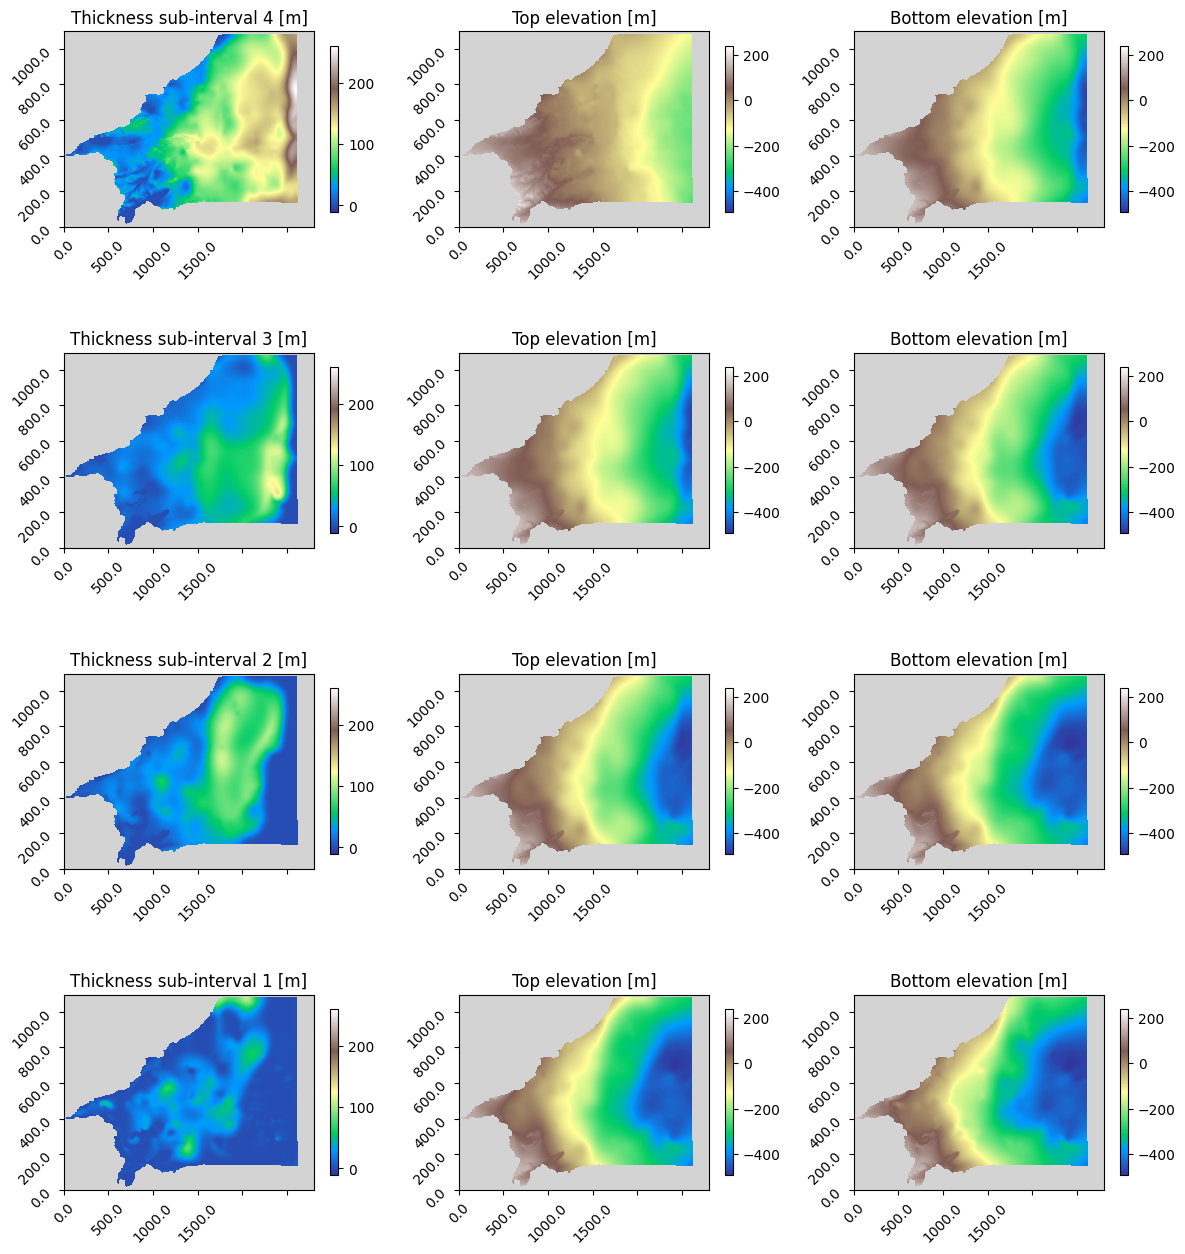

In [126]:
pos = 'lower'
shrink = 0.6
cm     = 1/2.54  # centimeters in inches
titles = ['Interval']

fig   = plt.figure(figsize=(12,13))
count = 1
for i in range(4):
    toit = set_surfaces_upc[i]
    mur  = set_surfaces_upc[i+1]
    diff = toit - mur

    ax  = fig.add_subplot(4,3,count)
    cax = ax.imshow(diff, cmap='terrain', origin='lower', vmin=min_diff, vmax=max_diff)
    ax.set_title('Thickness sub-interval {} [m]'.format(4-i))
    plt.colorbar(cax, ax=ax, shrink=shrink)
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    ax.set_yticklabels(ax.get_yticks(), rotation = 45)
    count+=1

    ax  = fig.add_subplot(4,3,count)
    cax = ax.imshow(toit, cmap='terrain', origin='lower', vmin=min_alt, vmax = max_alt)
    ax.set_title('Top elevation [m]')
    plt.colorbar(cax, ax=ax, shrink=shrink)
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    ax.set_yticklabels(ax.get_yticks(), rotation = 45)
    count+=1
    
    ax  = fig.add_subplot(4,3,count)
    cax = ax.imshow(mur, cmap='terrain', origin='lower', vmin=min_alt, vmax = max_alt)
    ax.set_title('Bottom elevation [m]')
    plt.colorbar(cax, ax=ax, shrink=shrink)
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    ax.set_yticklabels(ax.get_yticks(), rotation = 45)
    count+=1
    
#plt.colorbar(shrink=0.3)
plt.tight_layout()
plt.savefig('99_images/thesis_image/surfaces/surfaces_upc.pdf', bbox_inches='tight')

## Cross-sections

In [130]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors

In [127]:
plt.rcParams.update({'axes.facecolor':'lightgrey'})
plt.rcParams.update({'font.size': 10})

In [131]:
set_surfaces_3d = []

#load and interpolate to the new surfaces to the new resolution
names_select = ['s1_mnt', 's2_quat','upc_2', 'upc_12','upc_1', 's3_pc','s4_pms']

#names_select = ['s1_mnt','s2_quat', 's3_pc','s4_pms']
path_load = '../../09_modflow_roussillon/98_data/raster/2023_surfaces_txt/'

for file in names_select:
    print(file)
    #rast = Raster.load(path_base+'asc/{}.asc'.format(file))
    #rast = np.loadtxt(path_base+'asc/{}.asc'.format(file),skiprows=6)
    rast = np.loadtxt(path_load+'ascii_2023_{}.txt'.format(file),skiprows=6)
    rast[rast==9999] = np.nan
    rast = np.flipud(rast)
    set_surfaces_3d.append(rast)

s1_mnt
s2_quat
upc_2
upc_12
upc_1
s3_pc
s4_pms


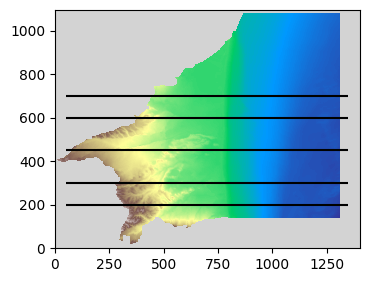

In [128]:
plt.figure(figsize=(10*cm, 10*cm))

plt.imshow(set_surfaces_3d[0], cmap='terrain', origin='lower')
y_pos = [200, 300, 450, 600, 700]
cm     = 1/2.54  # centimeters in inches


for y in y_pos:
    plt.hlines(y,50,1350, color='k')
plt.savefig('99_images/thesis_image/surfaces/cross_sections_models_position_y.pdf'.format(y), bbox_inches='tight')
plt.show()

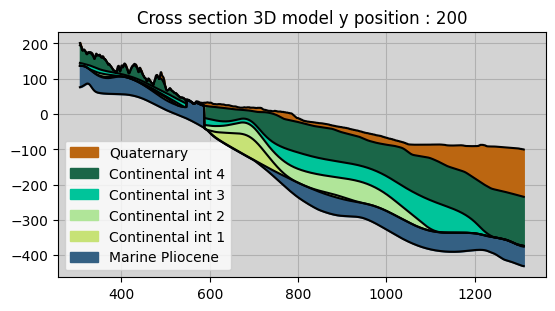

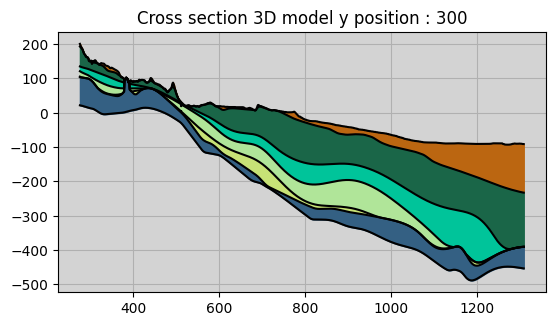

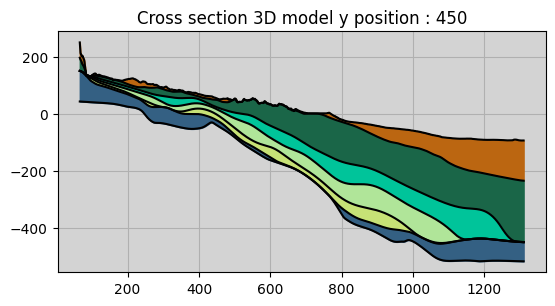

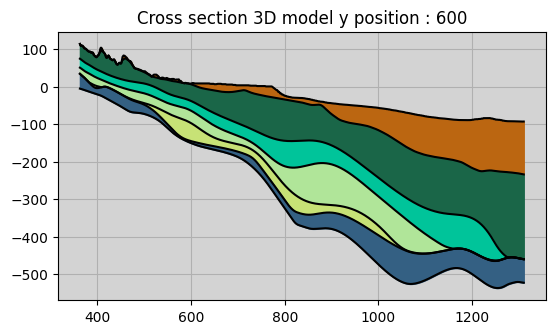

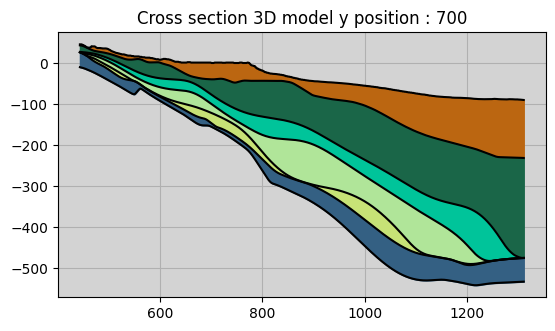

In [132]:
c = 0

for y in y_pos:
    lines = []

    for b in set_surfaces_3d:
        bot_line = np.copy(b[y,:])
        bot_line[bot_line==bot_line.max()] = np.nan
        lines.append(np.copy(bot_line))   


    plt.figure(figsize=(16*cm,10*cm))
    c_uni         = ['#bb6611', '#1a6648', '#00c49a', '#b0e599', '#c7e276', '#346083']
    label         = ['Quaternary', 'Continental int 4', 'Continental int 3', 'Continental int 2', 'Continental int 1', 'Marine Pliocene','t']

    for bl in lines:
        plt.plot(np.arange(0,set_surfaces_3d[0].shape[1]),bl, zorder=11, c='k')

    for i in range(len(lines)-1):
        plt.fill_between(np.arange(0,set_surfaces_3d[0].shape[1]), lines[i], lines[i+1], color=c_uni[i], zorder=9, label=label[i])

    ax = plt.gca() #you first need to get the axis handle
    ax.set_aspect(0.8) #sets the height to width ratio to 1.5.
    plt.title('Cross section 3D model y position : {}'.format(y))
    if c==0:
        plt.legend(facecolor='white')
    c+=1
    plt.axis()
    plt.grid()
    plt.savefig('99_images/thesis_image/surfaces/cross_sections_models_{}.pdf'.format(y), bbox_inches='tight')
    plt.show()

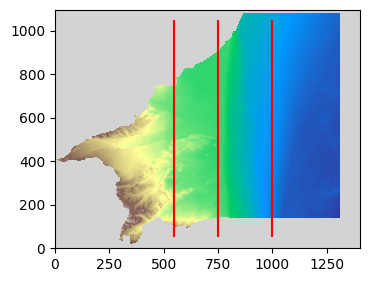

In [133]:
plt.figure(figsize=(10*cm, 10*cm))

plt.imshow(set_surfaces_3d[0], cmap='terrain', origin='lower')
x_pos = [550, 750, 1000]
cm     = 1/2.54  # centimeters in inches


for x in x_pos:
    plt.vlines(x,50,1050, color='red')
plt.savefig('99_images/thesis_image/surfaces/cross_sections_models_position_x.pdf'.format(y), bbox_inches='tight')
plt.show()

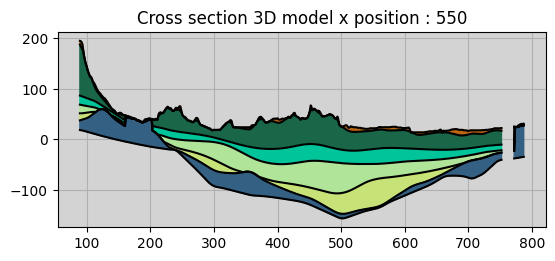

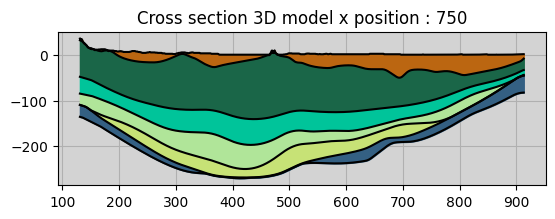

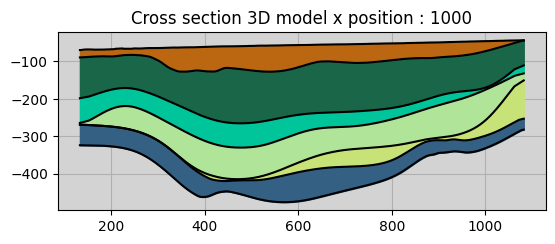

In [136]:
c = 0

for x in x_pos:
    lines = []

    for b in set_surfaces_3d:
        bot_line = np.copy(b[:,x])
        bot_line[bot_line==bot_line.max()] = np.nan
        lines.append(np.copy(bot_line))   


    plt.figure(figsize=(16*cm,10*cm))
    c_uni         = ['#bb6611', '#1a6648', '#00c49a', '#b0e599', '#c7e276', '#346083']
    label         = ['Quaternary', 'Continental int 4', 'Continental int 3', 'Continental int 2', 'Continental int 1', 'Marine Pliocene','t']

    for bl in lines:
        plt.plot(np.arange(0,set_surfaces_3d[0].shape[0]),bl, zorder=11, c='k')

    for i in range(len(lines)-1):
        plt.fill_between(np.arange(0,set_surfaces_3d[0].shape[0]), lines[i], lines[i+1], color=c_uni[i], zorder=9, label=label[i])

    ax = plt.gca() #you first need to get the axis handle
    ax.set_aspect(0.8) #sets the height to width ratio to 1.5.
    plt.title('Cross section 3D model x position : {}'.format(x))

    c+=1
    plt.axis()
    plt.grid()
    plt.savefig('99_images/thesis_image/surfaces/cross_sections_models_x_{}.pdf'.format(x), bbox_inches='tight')
    plt.show()

## Cross section and test 3D visu

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors

In [38]:
set_surfaces_3d = []

#load and interpolate to the new surfaces to the new resolution
names_select = ['s1_mnt', 's2_quat','upc_2', 'upc_12','upc_1', 's3_pc','s4_pms']

#names_select = ['s1_mnt','s2_quat', 's3_pc','s4_pms']
path_load = '../../09_modflow_roussillon/98_data/raster/2023_surfaces_txt/'

for file in names_select:
    print(file)
    #rast = Raster.load(path_base+'asc/{}.asc'.format(file))
    #rast = np.loadtxt(path_base+'asc/{}.asc'.format(file),skiprows=6)
    rast = np.loadtxt(path_load+'ascii_2023_{}.txt'.format(file),skiprows=6)
    rast[rast==9999] = np.nan
    rast = np.flipud(rast)
    set_surfaces_3d.append(rast)

s1_mnt
s2_quat
upc_2
upc_12
upc_1
s3_pc
s4_pms


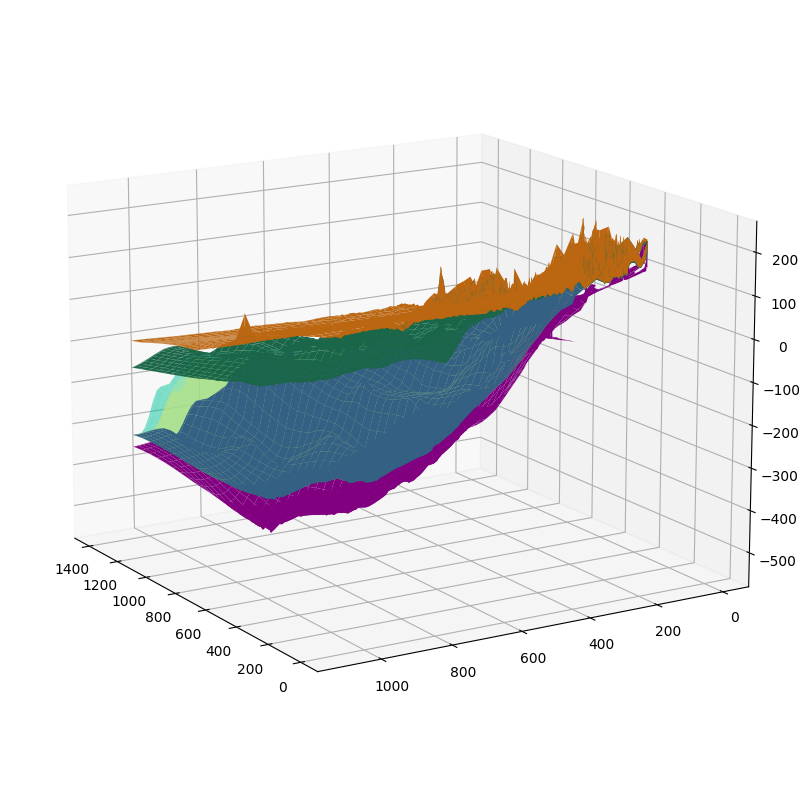

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create meshgrid
set_surfaces_3d_plot = np.copy(set_surfaces_3d)
#set_surfaces_3d_plot[:,500:,:] = np.nan
xx, yy = np.meshgrid(np.arange(0, set_surfaces_3d_plot[0].shape[-1]), np.arange(0, set_surfaces_3d_plot[0].shape[-2]))

# Create the figure and 3D axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set up the colormap
colors_uni = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']
colors_uni = ['#bb6611', '#1a6648', '#00c49a', '#b0e599', '#c7e276', '#346083','purple']
cmap_list  = [colors_uni[i] for i in range(7)]

my_cmap_list = [colors.ListedColormap(color_uni, name='my_colormap_name') for color_uni in colors_uni]

# Create the plot surfaces
alpha = [1,1,0.5,0.5,0.5,1,1]
surfaces = [ax.plot_surface(xx, yy, set_surfaces_3d_plot[i], alpha=alpha[i], cmap=my_cmap_list[i], shade=False) for i in range(7)]

# Define the update function for the animation
def update(frame):
    angle = frame * 1.5  # Adjust the rotation speed
    ax.view_init(elev=15, azim=angle)  # Set the view angle
    return surfaces

# Create the animation
animation = FuncAnimation(fig, update, frames=100, interval=100)

# Save the animation as a GIF or MP4 video
animation.save('99_images/thesis_image/surfaces/rotation_surface_3d.gif', writer='imagemagick')  # For GIF
#animation.save('rotation.mp4', writer='ffmpeg')  # For MP4

# Display the animation
plt.show()

### Enveloppe only

In [5]:
set_surfaces_3d = []

#load and interpolate to the new surfaces to the new resolution
names_select = ['s1_mnt', 's2_quat', 's3_pc','s4_pms']

#names_select = ['s1_mnt','s2_quat', 's3_pc','s4_pms']
path_load = '../../09_modflow_roussillon/98_data/raster/2023_surfaces_txt/'

for file in names_select:
    print(file)
    #rast = Raster.load(path_base+'asc/{}.asc'.format(file))
    #rast = np.loadtxt(path_base+'asc/{}.asc'.format(file),skiprows=6)
    rast = np.loadtxt(path_load+'ascii_2023_{}.txt'.format(file),skiprows=6)
    rast[rast==9999] = np.nan
    rast = np.flipud(rast)
    set_surfaces_3d.append(rast)

s1_mnt
s2_quat
s3_pc
s4_pms


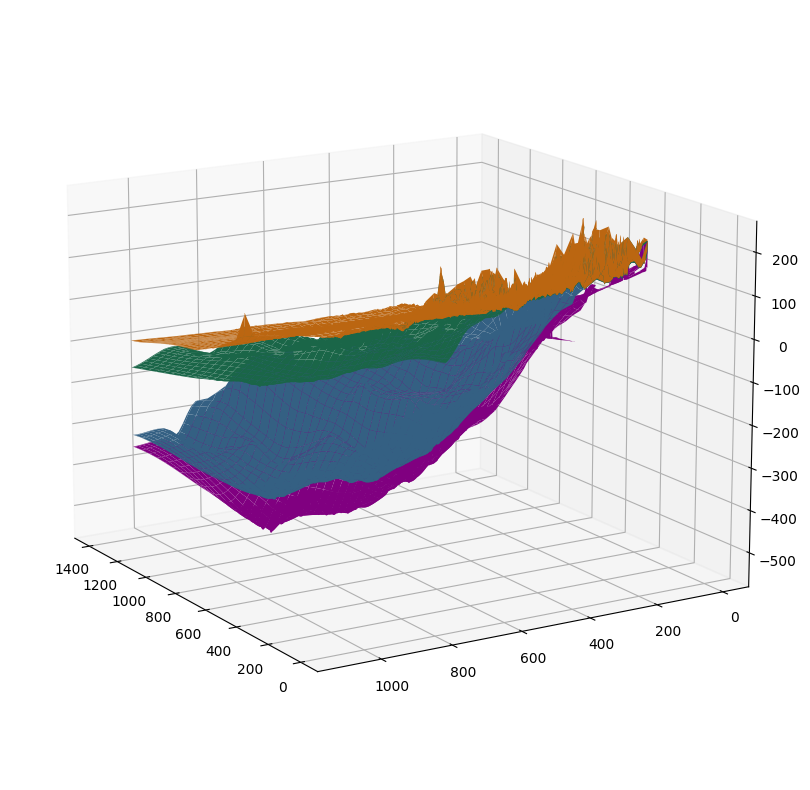

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create meshgrid
set_surfaces_3d_plot = np.copy(set_surfaces_3d)
#set_surfaces_3d_plot[:,500:,:] = np.nan
xx, yy = np.meshgrid(np.arange(0, set_surfaces_3d_plot[0].shape[-1]), np.arange(0, set_surfaces_3d_plot[0].shape[-2]))

# Create the figure and 3D axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set up the colormap
colors_uni = ['#bb6611', '#1a6648',  '#346083', 'purple']
cmap_list  = [colors_uni[i] for i in range(4)]

my_cmap_list = [colors.ListedColormap(color_uni, name='my_colormap_name') for color_uni in colors_uni]

# Create the plot surfaces
alpha = [1,1,1,1]
surfaces = [ax.plot_surface(xx, yy, set_surfaces_3d_plot[i], alpha=alpha[i], cmap=my_cmap_list[i], shade=False) for i in range(4)]

# Define the update function for the animation
def update(frame):
    angle = frame * 1.5  # Adjust the rotation speed
    ax.view_init(elev=15, azim=angle)  # Set the view angle
    return surfaces

# Create the animation
animation = FuncAnimation(fig, update, frames=100, interval=100)

# Save the animation as a GIF or MP4 video
animation.save('99_images/thesis_image/surfaces/rotation_env.gif', writer='imagemagick')  # For GIF
#animation.save('rotation.mp4', writer='ffmpeg')  # For MP4

# Display the animation
plt.show()

#### UPCs

In [102]:
set_surfaces_3d = []

#load and interpolate to the new surfaces to the new resolution
names_select = ['upc_2', 'upc_12','upc_1']

#names_select = ['s1_mnt','s2_quat', 's3_pc','s4_pms']
path_load = '../../09_modflow_roussillon/98_data/raster/2023_surfaces_txt/'

for file in names_select:
    print(file)
    #rast = Raster.load(path_base+'asc/{}.asc'.format(file))
    #rast = np.loadtxt(path_base+'asc/{}.asc'.format(file),skiprows=6)
    rast = np.loadtxt(path_load+'ascii_2023_{}.txt'.format(file),skiprows=6)
    rast[rast==9999] = np.nan
    rast = np.flipud(rast)
    set_surfaces_3d.append(rast)

upc_2
upc_12
upc_1


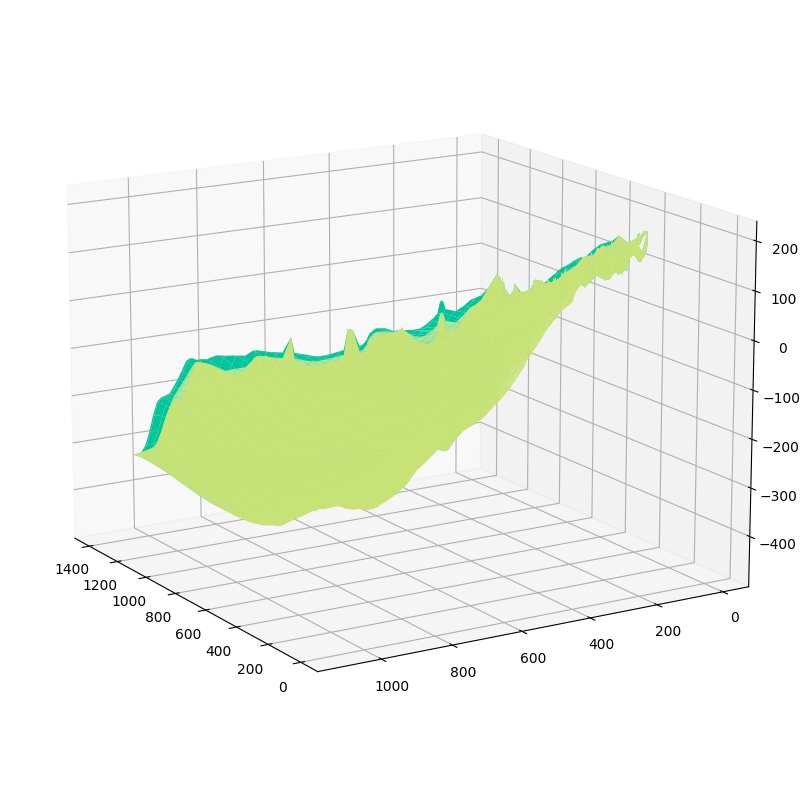

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create meshgrid
set_surfaces_3d_plot = np.copy(set_surfaces_3d)
#set_surfaces_3d_plot[:,500:,:] = np.nan
xx, yy = np.meshgrid(np.arange(0, set_surfaces_3d_plot[0].shape[-1]), np.arange(0, set_surfaces_3d_plot[0].shape[-2]))

# Create the figure and 3D axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set up the colormap
colors_uni = [ '#00c49a', '#b0e599', '#c7e276']
cmap_list  = [colors_uni[i] for i in range(3)]

my_cmap_list = [colors.ListedColormap(color_uni, name='my_colormap_name') for color_uni in colors_uni]

# Create the plot surfaces
alpha = [1,1,1]
surfaces = [ax.plot_surface(xx, yy, set_surfaces_3d_plot[i], alpha=alpha[i], cmap=my_cmap_list[i], shade=False) for i in range(3)]

# Define the update function for the animation
def update(frame):
    angle = frame * 1.5  # Adjust the rotation speed
    ax.view_init(elev=15, azim=angle)  # Set the view angle
    return surfaces

# Create the animation
animation = FuncAnimation(fig, update, frames=100, interval=100)

# Save the animation as a GIF or MP4 video
animation.save('99_images/thesis_image/surfaces/rotatio_upc.gif', writer='imagemagick')  # For GIF
#animation.save('rotation.mp4', writer='ffmpeg')  # For MP4

# Display the animation
plt.show()

## Hard data interpolation UPC

In [21]:
from matplotlib import colors
cm = 1/2.54  # centimeters in inches
barCol      = [134/255,190/255,181/255] #vert
crevasseCol = [211/255,131/255,86/255]  #light blue
palustreCol = [33/255,131/255,126/255]  #teil
chenalCol   = [212/255,189/255,125/255] #beige
floodCol    = [42/255,88/255,126/255]   #bleu
fanCol      = [111/255,136/255,145/255] #grey
#floodCol   = [223/255,232/255,232/255]  
white = [255,255,255]

col5f = [fanCol, chenalCol, barCol, crevasseCol, floodCol]
col6f = [floodCol,palustreCol,crevasseCol,barCol,chenalCol,fanCol]

cmap_5f = colors.ListedColormap(col5f)
cmap_6f = colors.ListedColormap(col6f)

In [17]:
import pickle
origin  = [664525, 6152875] #x, y
extent  = [664525,734725,6152875,6207725]
spacing = [50, 50]

upc_data = []
upc_data.append(pd.read_csv('../../05_grid_creation/01_surfaces_interpolation_upc/surfaces_interpolation_data/hard_data_upc/points_{}.csv'.format('UPc1'), index_col=False))
upc_data.append(pd.read_csv('../../05_grid_creation/01_surfaces_interpolation_upc/surfaces_interpolation_data/hard_data_upc/points_{}.csv'.format('UPc12'), index_col=False))
upc_data.append(pd.read_csv('../../05_grid_creation/01_surfaces_interpolation_upc/surfaces_interpolation_data/hard_data_upc/points_{}.csv'.format('UPc2'), index_col=False))

with open('../../05_grid_creation/01_surfaces_interpolation_upc/surfaces_interpolation_data/upc_offshore_CN.pickle', 'rb') as file:
    upc_data.append(pickle.load(file))
with open('../../05_grid_creation/01_surfaces_interpolation_upc/surfaces_interpolation_data/upc_offshore_east.pickle', 'rb') as file:
    upc_data.append(pickle.load(file))

with open('../../05_grid_creation/01_surfaces_interpolation_upc/surfaces_interpolation_data/upc_onshore.pickle', 'rb') as file:
    upc_data.append(pickle.load(file))

with open('../../05_grid_creation/01_surfaces_interpolation_upc/surfaces_interpolation_data/upc_offshore_border.pickle', 'rb') as file:
    upc_data.append(pickle.load(file))

with open('../../05_grid_creation/01_surfaces_interpolation_upc/surfaces_interpolation_data/upc_offshore_ouest.pickle', 'rb') as file:
    upc_data.append(pickle.load(file))

In [18]:
for i1 in range(3):
    upc_data[i1]['x_cell'] = [int(i) for i in (upc_data[i1].X-origin[0])/50]
    upc_data[i1]['y_cell'] = [int(i) for i in (upc_data[i1].Y-origin[1])/50]

upc_data[0].head(2)

,id,X,Y,depth,z_top,z_horizon,x_cell,y_cell
0,10972X0135,699007.1,6163491.8,69.49,14.0,-55.49,689,212
1,10972X0137,698798.7,6164975.0,69.94,12.0,-57.94,685,242


In [19]:
upc_data[1].head(2)

,id,X,Y,depth,z_top,z_horizon,x_cell,y_cell
0,10972X0135,699007.1,6163491.8,25.44,14.0,-11.44,689,212
1,10972X0137,698798.7,6164975.0,41.33,12.0,-29.33,685,242


In [20]:
upc_data[5][0]

[array([ 247,  545, 1273, ...,  386, 1035,  802]),
 array([510, 470, 366, ..., 446, 132, 201]),
 array([ 7.70374479e+01, -1.23130647e+02, -4.32186632e+02, ...,
         3.38168652e-01, -2.85687289e+02, -1.95543050e+02])]

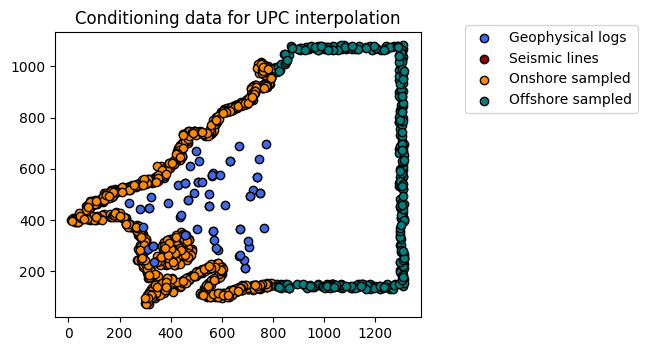

In [27]:
plt.figure(figsize=(12*cm,10*cm))
im = plt.scatter(upc_data[0].x_cell,upc_data[0].y_cell,edgecolor='black',c='royalblue', zorder=8,label='Geophysical logs')
im = plt.scatter(upc_data[1].x_cell.values[::80],upc_data[1].y_cell.values[::80],edgecolor='black',c='darkred', zorder=4,label='Seismic lines')
im = plt.scatter(upc_data[4][0][0][::60],upc_data[4][0][1][::60],edgecolor='black',c='darkorange', zorder=4,label='Onshore sampled')
#im = plt.scatter(upc_data[3][0][0][::60],upc_data[3][0][1][::60],edgecolor='black',c='darkgreen', zorder=4,label='Sampled')
im = plt.scatter(upc_data[6][0][0][::60],upc_data[6][0][1][::60],edgecolor='black',c='teal', zorder=4,label='Offshore sampled')

plt.title('Conditioning data for UPC interpolation')
plt.axis('scaled')
plt.legend(bbox_to_anchor=(1.1, 1.05))
#plt.savefig('99_images/thesis_image/surfaces/upc_interpolation_data.pdf', bbox_inches='tight')
plt.show()

## Plot 3D UPC point sets

In [28]:
set_surfaces_3d = []

#load and interpolate to the new surfaces to the new resolution
names_select = ['s1_mnt', 's2_quat', 's3_pc','s4_pms']

#names_select = ['s1_mnt','s2_quat', 's3_pc','s4_pms']
path_load = '../../09_modflow_roussillon/98_data/raster/2023_surfaces_txt/'

for file in names_select:
    print(file)
    #rast = Raster.load(path_base+'asc/{}.asc'.format(file))
    #rast = np.loadtxt(path_base+'asc/{}.asc'.format(file),skiprows=6)
    rast = np.loadtxt(path_load+'ascii_2023_{}.txt'.format(file),skiprows=6)
    rast[rast==9999] = np.nan
    rast = np.flipud(rast)
    set_surfaces_3d.append(rast)

s1_mnt
s2_quat
s3_pc
s4_pms


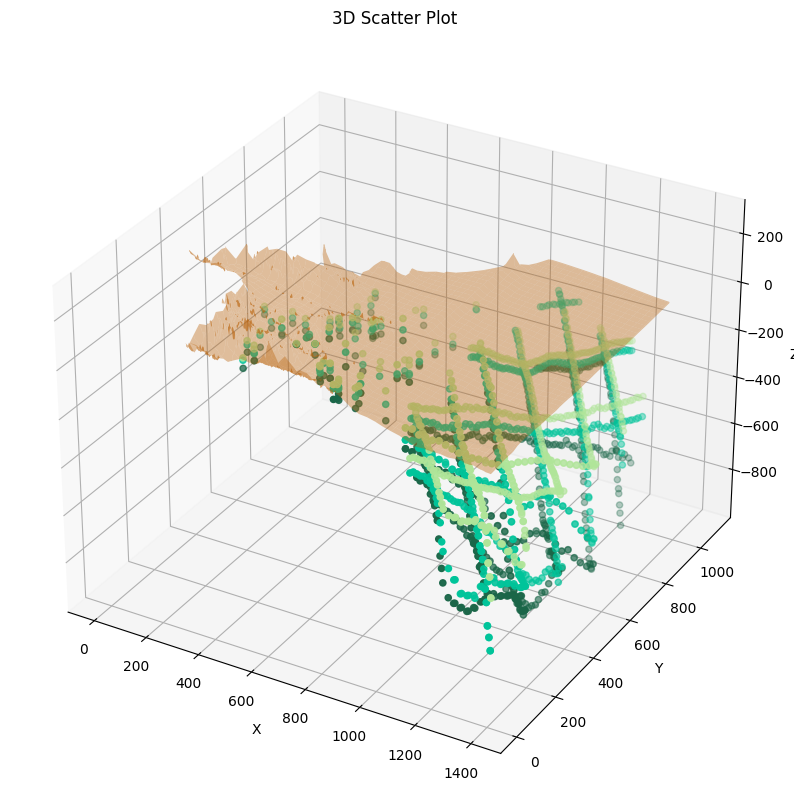

In [34]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax  = plt.axes(projection='3d')

set_surfaces_3d_plot = np.copy(set_surfaces_3d)
c_uni                = ['#1a6648', '#00c49a', '#b0e599']

# Set up the colormap
colors_uni   = ['#bb6611', '#1a6648',  '#346083', 'orange']
cmap_list    = [colors_uni[i] for i in range(4)]
my_cmap_list = [colors.ListedColormap(color_uni, name='my_colormap_name') for color_uni in colors_uni]

# Plot the points
ax.scatter3D(upc_data[0].x_cell, upc_data[0].y_cell, -upc_data[0].depth, c=c_uni[0], marker='o')
ax.scatter3D(upc_data[1].x_cell, upc_data[1].y_cell, -upc_data[1].depth, c=c_uni[1], marker='o')
ax.scatter3D(upc_data[2].x_cell, upc_data[2].y_cell, -upc_data[2].depth, c=c_uni[2], marker='o')

ax.scatter3D(upc_data[3].x_cell.values[::80], upc_data[3].y_cell.values[::80], upc_data[3].upc1.values[::80], c=c_uni[0], marker='o')
ax.scatter3D(upc_data[3].x_cell.values[::80], upc_data[3].y_cell.values[::80], upc_data[3].upc12.values[::80],c=c_uni[1], marker='o')
ax.scatter3D(upc_data[3].x_cell.values[::80], upc_data[3].y_cell.values[::80], upc_data[3].upc2.values[::80], c=c_uni[2], marker='o')

xx, yy = np.meshgrid(np.arange(0, set_surfaces_3d_plot[0].shape[-1]), np.arange(0, set_surfaces_3d_plot[0].shape[-2]))
ax.plot_surface(xx, yy, set_surfaces_3d_plot[0], alpha=0.4, cmap=my_cmap_list[0], shade=False) 

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.savefig('99_images/thesis_image/surfaces/hd_surface_3d_map.png', bbox_inches='tight')
plt.show()

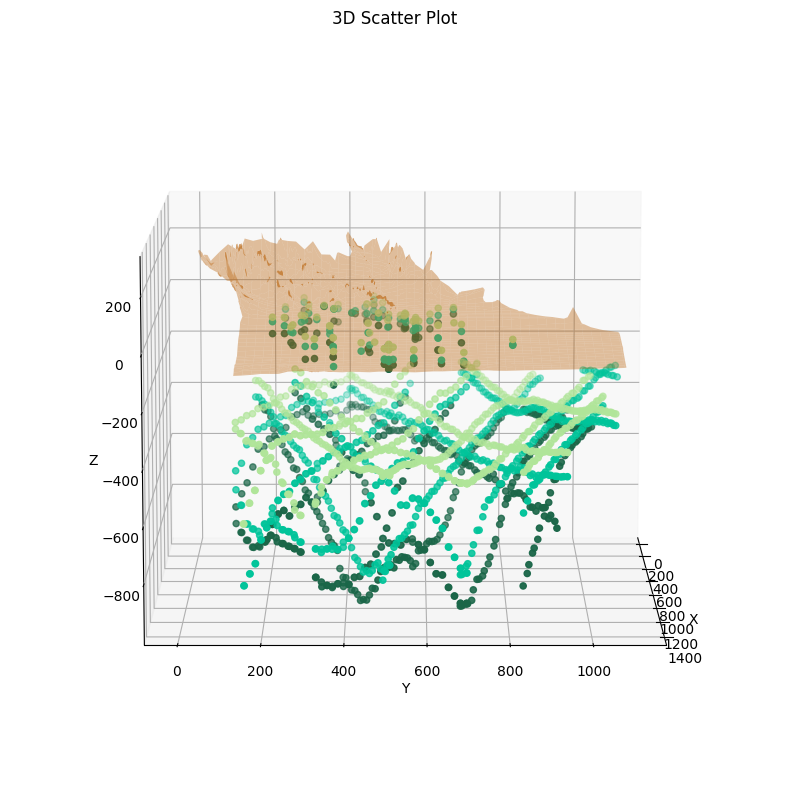

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import colors
from matplotlib.animation import FuncAnimation

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

set_surfaces_3d_plot = np.copy(set_surfaces_3d)
c_uni = ['#1a6648', '#00c49a', '#b0e599']

# Set up the colormap
colors_uni = ['#bb6611', '#1a6648', '#346083', 'purple']
cmap_list = [colors_uni[i] for i in range(4)]
my_cmap_list = [colors.ListedColormap(color_uni, name='my_colormap_name') for color_uni in colors_uni]

# Plot the points
points = []
points.append(ax.scatter3D(upc_data[0].x_cell, upc_data[0].y_cell, -upc_data[0].depth, c=c_uni[0], marker='o'))
points.append(ax.scatter3D(upc_data[1].x_cell, upc_data[1].y_cell, -upc_data[1].depth, c=c_uni[1], marker='o'))
points.append(ax.scatter3D(upc_data[2].x_cell, upc_data[2].y_cell, -upc_data[2].depth, c=c_uni[2], marker='o'))
points.append(ax.scatter3D(upc_data[3].x_cell.values[::80], upc_data[3].y_cell.values[::80], upc_data[3].upc1.values[::80], c=c_uni[0], marker='o'))
points.append(ax.scatter3D(upc_data[3].x_cell.values[::80], upc_data[3].y_cell.values[::80], upc_data[3].upc12.values[::80], c=c_uni[1], marker='o'))
points.append(ax.scatter3D(upc_data[3].x_cell.values[::80], upc_data[3].y_cell.values[::80], upc_data[3].upc2.values[::80], c=c_uni[2], marker='o'))

xx, yy = np.meshgrid(np.arange(0, set_surfaces_3d_plot[0].shape[-1]), np.arange(0, set_surfaces_3d_plot[0].shape[-2]))
ax.plot_surface(xx, yy, set_surfaces_3d_plot[0], alpha=0.4, cmap=my_cmap_list[0], shade=False) 

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# Function to update the plot for each frame
def update(frame):
    ax.view_init(elev=10, azim=frame)  # Rotate the camera around the plot

# Create the animation
animation = FuncAnimation(fig, update, frames=np.linspace(0, 360, 100), interval=150)

# Save the animation as a GIF
animation.save('99_images/thesis_image/surfaces/3d_rotation_map.gif', writer='pillow')

# Show the plot
plt.show()